In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [10]:
data = pd.read_csv('IMDB Dataset.csv')

In [11]:
data.head(6)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [12]:
data.shape

(50000, 2)

In [14]:
data.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [15]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [16]:
# Example (basic preprocessing, more advanced techniques might be needed)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
padded_sequences = pad_sequences(sequences, maxlen=100)

In [17]:
def convert_sentiment(sentiment):
    if sentiment == 'positive':
        return 1
    else:
        return 0

data['sentiment'] = data['sentiment'].apply(convert_sentiment)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['sentiment'], test_size=0.2)

In [19]:
model = Sequential([
    Embedding(5000, 64),
    #num of neurn in layer64
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 87s 68ms/step - loss: 0.3837 - accuracy: 0.8253 - val_loss: 0.3331 - val_accuracy: 0.8558
Epoch 2/10
1250/1250 [==============================] - 108s 86ms/step - loss: 0.2840 - accuracy: 0.8820 - val_loss: 0.3177 - val_accuracy: 0.8595
Epoch 3/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.2367 - accuracy: 0.9032 - val_loss: 0.3114 - val_accuracy: 0.8671
Epoch 4/10
1250/1250 [==============================] - 85s 68ms/step - loss: 0.1983 - accuracy: 0.9205 - val_loss: 0.3272 - val_accuracy: 0.8683
Epoch 5/10
1250/1250 [==============================] - 94s 76ms/step - loss: 0.1636 - accuracy: 0.9359 - val_loss: 0.3543 - val_accuracy: 0.8635
Epoch 6/10
1250/1250 [==============================] - 112s 90ms/step - loss: 0.1378 - accuracy: 0.9478 - val_loss: 0.4139 - val_accuracy: 0.8580
Epoch 7/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.1143 - accuracy: 0.9573 - val_loss: 0.4249

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

313/313 [==============================] - 7s 23ms/step - loss: 0.5650 - accuracy: 0.8518
Accuracy: 0.8518000245094299


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
y_pred = model.predict(X_test)
# Convert probabilities to class labels (for classification tasks)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 8s 24ms/step


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

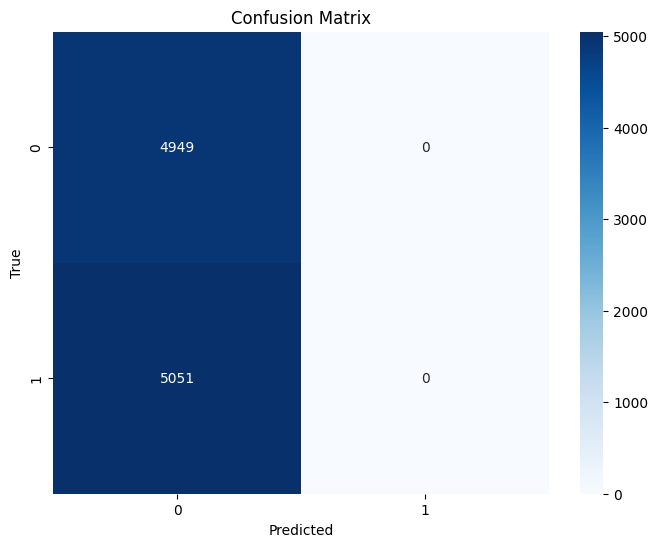

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show() 

In [26]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4949
           1       0.00      0.00      0.00      5051

    accuracy                           0.49     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.24      0.49      0.33     10000



C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [27]:
from keras.layers import SimpleRNN

modelR = Sequential([
  Embedding(5000, 64),
  SimpleRNN(64),
  Dense(1, activation='sigmoid')
])

modelR.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
modelR.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 57s 44ms/step - loss: 0.4925 - accuracy: 0.7487 - val_loss: 0.3607 - val_accuracy: 0.8460
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.3691 - accuracy: 0.8439 - val_loss: 0.3863 - val_accuracy: 0.8348
Epoch 3/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.3570 - accuracy: 0.8428 - val_loss: 0.6186 - val_accuracy: 0.6466
Epoch 4/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.3889 - accuracy: 0.8259 - val_loss: 0.4219 - val_accuracy: 0.8243
Epoch 5/10
1250/1250 [==============================] - 47s 38ms/step - loss: 0.2985 - accuracy: 0.8796 - val_loss: 0.4070 - val_accuracy: 0.8241
Epoch 6/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.3501 - accuracy: 0.8418 - val_loss: 0.5910 - val_accuracy: 0.6740
Epoch 7/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.4462 - accuracy: 0.7846 - val_loss: 0.5397 -

In [29]:
y_pred = model.predict(X_test)
# Convert probabilities to class labels (for classification tasks)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 9s 29ms/step


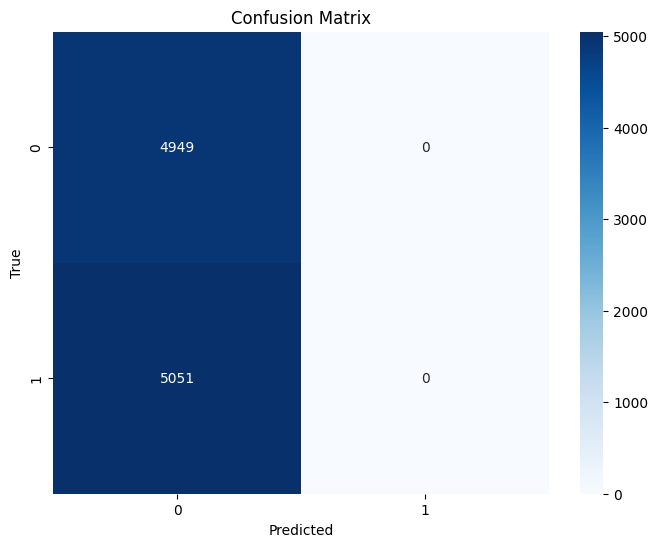

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show() 

In [31]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4949
           1       0.00      0.00      0.00      5051

    accuracy                           0.49     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.24      0.49      0.33     10000



C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikhil Kumar Jha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,